<a href="https://colab.research.google.com/github/nouha18/pythoncheckpoint/blob/update/Logistic_Regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pand
import numpy as np

df= pand.read_csv('titanic.csv')
df.drop('Cabin',
  axis='columns', inplace=True)



In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [5]:
df.columns = df.columns.str.replace(' ', '')

In [6]:
df.sum().isnull()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
dtype: bool

In [7]:
df['Survived'].astype(np.float32)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

x =df[["Parch","SibSp"]].values
y=df["Survived"].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=60) 
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.59


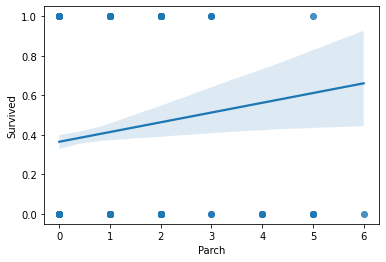

In [18]:
sns.regplot(x='Parch',y='Survived',scatter="true",data=df)

In [ ]:
sns.regplot(x='SibSp',y='Survived',data=df)

In [ ]:
confusion_matrix = pand.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Matrix description :** noting that 15*100 of predicted TP means survived people, and 100 is False Negative means dead and predicted survived.
Otherwise, only 9 predicted values are False Positive which means they are pretended dead but they survived.
Finally only 10 are True Négative that means 10 are predicted dead and they are really dead. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

For the first **recall** result we got 94% correct prediction and only 9% are false.
Not so bad because we have 59% of **precision** for "0" and 53% for "1" output.
